In [1]:
import csv
# Natural language processors 
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
# Pandas for csv files
import pandas as pd
! pip install textblob
import textblob
# Regex 
import re
import regex
# Numpy
import numpy as np
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
# spacy for lemmatization
import spacy
# Plotting tools
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pyLDAvis
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zacch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\Zacch\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\Zacch\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:
song= pd.read_csv("finalized1.csv",encoding='utf-8')

In [3]:
song

,name,album (year),song name,url,year,lyrics,song url
0,03 Greedo,"mixtape: ""Purple Summer"" (2016)",Sweet Lady,https://www.azlyrics.com/lyrics/03greedo/sweet...,2016,"its only one, 03, i'm from grape street, where...",https://www.azlyrics.com/lyrics/03greedo/sweet...
1,03 Greedo,"mixtape: ""The Wolf Of Grape Street"" (2018)",Sweet Lady(Bonus Track),https://www.azlyrics.com/lyrics/03greedo/sweet...,2018,"its only one, 03, i'm from grape street, where...",https://www.azlyrics.com/lyrics/03greedo/sweet...
2,03 Greedo,"mixtape: ""Purple Summer"" (2016)",Thirsty,https://www.azlyrics.com/lyrics/03greedo/thirs...,2016,"some of my, some of my, some of my, some of my...",https://www.azlyrics.com/lyrics/03greedo/thirs...
3,03 Greedo,"mixtape: ""Purple Summer"" (2016)",Moonrocks Freestyle,https://www.azlyrics.com/lyrics/03greedo/moonr...,2016,"ohh ohh, ohh oh oh oh, ohh oh oh oh oh, oh oh ...",https://www.azlyrics.com/lyrics/03greedo/moonr...
4,03 Greedo,"mixtape: ""Purple Summer"" (2016)",Mafia Business,https://www.azlyrics.com/lyrics/03greedo/mafia...,2016,"you gonna make me put you in a suit and tie, s...",https://www.azlyrics.com/lyrics/03greedo/mafia...
...,...,...,...,...,...,...,...
793,98 Degrees,"album: ""Let It Snow"" (2017)(as 98°)",The First Noel,https://www.azlyrics.com/lyrics/98degrees/thef...,2017,"the first noel, the angels did say, was to cer...",https://www.azlyrics.com/lyrics/98degrees/thef...
794,98 Degrees,"album: ""Let It Snow"" (2017)(as 98°)",Little Saint Nick,https://www.azlyrics.com/lyrics/98degrees/litt...,2017,"merry christmas, saint nick, well, way up nort...",https://www.azlyrics.com/lyrics/98degrees/litt...
795,98 Degrees,"album: ""Let It Snow"" (2017)(as 98°)",Have Yourself A Merry Little Christmas,https://www.azlyrics.com/lyrics/98degrees/have...,2017,"have yourself a merry little christmas, let yo...",https://www.azlyrics.com/lyrics/98degrees/have...
796,98 Degrees,"album: ""Let It Snow"" (2017)(as 98°)",River,https://www.azlyrics.com/lyrics/98degrees/rive...,2017,"it's coming on christmas, they're cutting down...",https://www.azlyrics.com/lyrics/98degrees/rive...


In [8]:
# Changes the lyrics column into a list to be modified later
lyric = song["lyrics"].tolist()

# Cleans and tokenizes the words 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 
        
lyric_words = list(sent_to_words(lyric))

print(lyric_words[0])

['its', 'only', 'one', 'from', 'grape', 'street', 'where', 'we', 'slide', 'sweet', 'shay', 'shay', 'would', 'you', 'be', 'mine', 'you', 'know', 'like', 'em', 'dark', 'skin', 'like', 'shay', 'shay', 'got', 'that', 'pretty', 'smooth', 'skin', 'like', 'fay', 'fay', 'think', 'shanini', 'got', 'body', 'like', 'tata', 'she', 'fuck', 'with', 'greedy', 'cause', 'he', 'fuck', 'her', 'like', 'pornstar', 'freaky', 'deeky', 'heard', 'her', 'pussy', 'got', 'that', 'voodoo', 'know', 'she', 'gay', 'but', 'done', 'fell', 'in', 'love', 'with', 'poo', 'poo', 'sex', 'appeal', 'like', 'butt', 'butt', 'like', 'ooh', 'woo', 'go', 'to', 'court', 'for', 'nigga', 'like', 'why', 'goo', 'fuck', 'around', 'and', 'drop', 'some', 'codeine', 'in', 'my', 'champagne', 'she', 'going', 'in', 'like', 'diamond', 'lane', 'in', 'the', 'diamond', 'lane', 'she', 'going', 'down', 'like', 'the', 'motherfuckin', 'stock', 'exchange', 'addicted', 'like', 'some', 'cocaine', 'to', 'the', 'campaign', 'like', 'the', 'woods', 'kiss', '

In [9]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [10]:
lyric_words_nostops = remove_stopwords(lyric_words)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
lyric_lemmatized = lemmatization(lyric_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(lyric_lemmatized[0])

['grape', 'street', 'slide', 'sweet', 'shay', 'shay', 'know', 'dark', 'skin', 'shay', 'shay', 'get', 'pretty', 'smooth', 'skin', 'fay', 'fay', 'think', 'shanini', 'get', 'body', 'tata', 'fuck', 'greedy', 'cause', 'fuck', 'pornstar', 'freaky', 'deeky', 'hear', 'pussy', 'get', 'voodoo', 'know', 'gay', 'do', 'fall', 'love', 'poo', 'poo', 'sex', 'appeal', 'butt', 'butt', 'woo', 'go', 'court', 'nigga', 'goo', 'fuck', 'around', 'drop', 'codeine', 'champagne', 'go', 'diamond', 'lane', 'diamond', 'lane', 'go', 'motherfuckin', 'stock', 'exchange', 'addict', 'cocaine', 'campaign', 'wood', 'kiss', 'motherfuckin', 'ashtray', 'time', 'poo', 'poo', 'bet', 'make', 'ass', 'shake', 'baby', 'get', 'straight', 'act', 'gay', 'fuck', 'interrupt', 'get', 'stack', 'bae', 'atlanta', 'know', 'day', 'back', 'bae', 'support', 'daughter', 'back', 'pay', 'get', 'creep', 'mask', 'face', 'put', 'bitch', 'blade', 'fuck', 'backpage', 'doin', 'number', 'motherfuckin', 'fact', 'page', 'seventh', 'letter', 'crooked', 'la

In [19]:
song["tokenize"]= lyric_lemmatized
song["counter"]= song["tokenize"].apply(len)
song["unique_word_count"]= song["tokenize"].apply(np.unique).apply(len)
song["ratio"]= song["unique_word_count"].div(song["counter"])

In [20]:
song

,name,album (year),song name,url,year,lyrics,song url,tokenize,counter,unique_word_count,ratio
0,03 Greedo,"mixtape: ""Purple Summer"" (2016)",Sweet Lady,https://www.azlyrics.com/lyrics/03greedo/sweet...,2016,"its only one, 03, i'm from grape street, where...",https://www.azlyrics.com/lyrics/03greedo/sweet...,"[grape, street, slide, sweet, shay, shay, know...",385,189,0.490909
1,03 Greedo,"mixtape: ""The Wolf Of Grape Street"" (2018)",Sweet Lady(Bonus Track),https://www.azlyrics.com/lyrics/03greedo/sweet...,2018,"its only one, 03, i'm from grape street, where...",https://www.azlyrics.com/lyrics/03greedo/sweet...,"[grape, street, slide, sweet, shay, shay, know...",385,189,0.490909
2,03 Greedo,"mixtape: ""Purple Summer"" (2016)",Thirsty,https://www.azlyrics.com/lyrics/03greedo/thirs...,2016,"some of my, some of my, some of my, some of my...",https://www.azlyrics.com/lyrics/03greedo/thirs...,"[bitch, sip, liquor, bitchea, sip, lean, put, ...",55,45,0.818182
3,03 Greedo,"mixtape: ""Purple Summer"" (2016)",Moonrocks Freestyle,https://www.azlyrics.com/lyrics/03greedo/moonr...,2016,"ohh ohh, ohh oh oh oh, ohh oh oh oh oh, oh oh ...",https://www.azlyrics.com/lyrics/03greedo/moonr...,"[ever, give, fuck, bitch, always, break, never...",123,95,0.772358
4,03 Greedo,"mixtape: ""Purple Summer"" (2016)",Mafia Business,https://www.azlyrics.com/lyrics/03greedo/mafia...,2016,"you gonna make me put you in a suit and tie, s...",https://www.azlyrics.com/lyrics/03greedo/mafia...,"[gon, make, put, suit, tie, steady, speakin, b...",167,79,0.473054
...,...,...,...,...,...,...,...,...,...,...,...
793,98 Degrees,"album: ""Let It Snow"" (2017)(as 98°)",The First Noel,https://www.azlyrics.com/lyrics/98degrees/thef...,2017,"the first noel, the angels did say, was to cer...",https://www.azlyrics.com/lyrics/98degrees/thef...,"[first, noel, angel, say, certain, poor, sheph...",58,30,0.517241
794,98 Degrees,"album: ""Let It Snow"" (2017)(as 98°)",Little Saint Nick,https://www.azlyrics.com/lyrics/98degrees/litt...,2017,"merry christmas, saint nick, well, way up nort...",https://www.azlyrics.com/lyrics/98degrees/litt...,"[merry, christmas, saint, nick, well, way, nor...",133,61,0.458647
795,98 Degrees,"album: ""Let It Snow"" (2017)(as 98°)",Have Yourself A Merry Little Christmas,https://www.azlyrics.com/lyrics/98degrees/have...,2017,"have yourself a merry little christmas, let yo...",https://www.azlyrics.com/lyrics/98degrees/have...,"[merry, little, christmas, let, heart, light, ...",39,31,0.794872
796,98 Degrees,"album: ""Let It Snow"" (2017)(as 98°)",River,https://www.azlyrics.com/lyrics/98degrees/rive...,2017,"it's coming on christmas, they're cutting down...",https://www.azlyrics.com/lyrics/98degrees/rive...,"[come, christma, cut, tree, put, reindeer, sin...",108,47,0.435185


0.053715982223314196
0.04351550613778121
0.001401821850726792


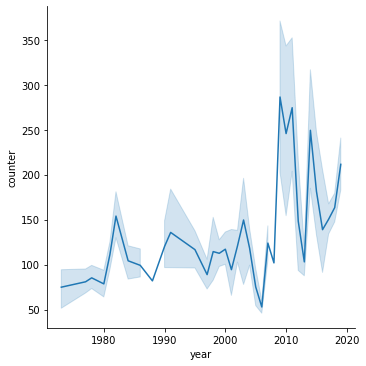

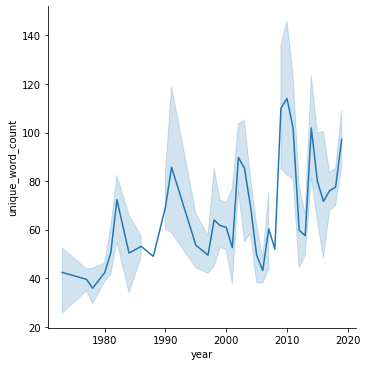

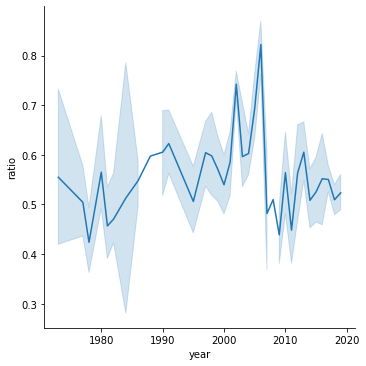

In [21]:
counts = ["counter", "unique_word_count", "ratio"]

for count in counts: 
    # Normalized between a 0 and 1 interval
    counter1= song[count].values.reshape(-1,1)
    year= song["year"].values.reshape(-1,1)
    # prints the plot out for each y value in counts
    sns.relplot(x="year", y=count, data=song, kind="line")
    scaler= MinMaxScaler()
    scaler.fit_transform(counter1)
    xtrain, xtest, ytrain, ytest= train_test_split(year, counter1, test_size=.25)
    model= linear_model.LinearRegression()
    model.fit(xtrain,ytrain)
    ypred_test=model.predict(xtest)
    print(metrics.r2_score(ytest,ypred_test))

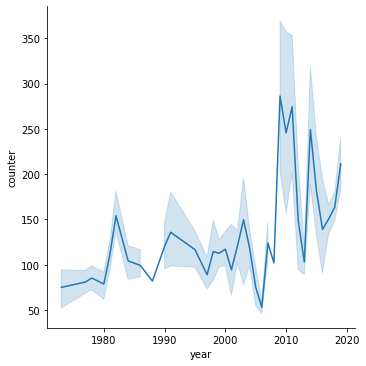

In [24]:
# Prints out the plot to save to a PDF
sns.relplot(x="year", y="counter", data=song, kind="line")
plt.savefig("project2_fig1_114114488.pdf")

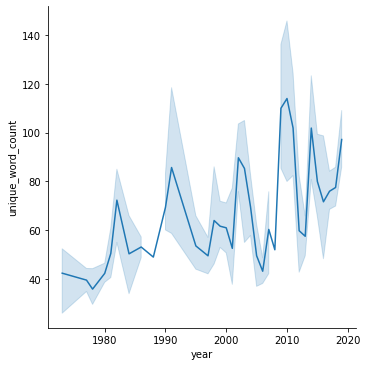

In [25]:
# Saves the figure as a PDF
sns.relplot(x="year", y="unique_word_count", data=song, kind="line")
plt.savefig("project2_fig2_114114488.pdf")

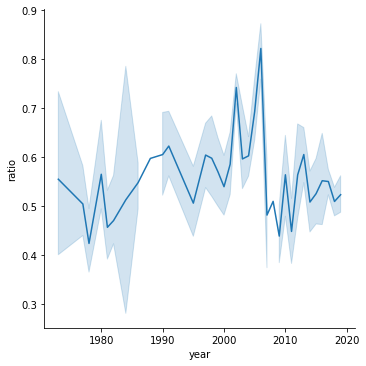

In [26]:
# Saves the PDF form of the figure
sns.relplot(x="year", y="ratio", data=song, kind="line")
plt.savefig("project2_fig3_114114488.pdf")